In [1]:
#Importing required Libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Understanding Vega Sets
from vega_datasets import data

data.list_datasets()

['7zip',
 'airports',
 'annual-precip',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'ohlc',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'uniform-2d',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'volcano',
 'weather',
 'weball26',
 'wheat',

In [3]:
from vega_datasets import local_data
local_data.list_datasets()

['airports',
 'anscombe',
 'barley',
 'burtin',
 'cars',
 'crimea',
 'driving',
 'iowa-electricity',
 'iris',
 'la-riots',
 'ohlc',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'stocks',
 'us-employment',
 'wheat']

In [4]:
#Understanding Anscombe Data
local_data.anscombe.description 

"Anscombe's Quartet is a famous dataset constructed by Francis Anscombe [1]_. Common summary statistics are identical for each subset of the data, despite the subsets having vastly different characteristics."

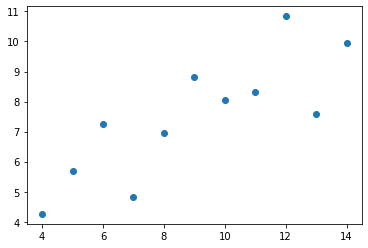

In [5]:
#TODO: Question
df = local_data.anscombe()
df.head()
sampled_Data = df[df['Series'].isin(['I'])]
sampled_Data.head()
plt.scatter(x=sampled_Data['X'], y=sampled_Data['Y'])

In [6]:
#Understanding Histograms
car_df = local_data.cars().astype({'Year': 'object'})
car_df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01 00:00:00,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01 00:00:00,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01 00:00:00,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01 00:00:00,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01 00:00:00,USA


In [7]:
car_df.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f870093eb50>,
      dtype=object)

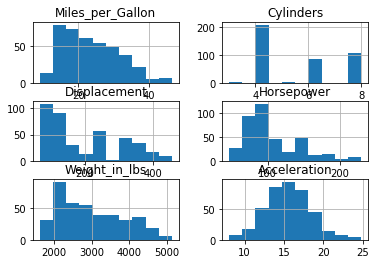

In [8]:
car_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8700773690>,
      dtype=object)

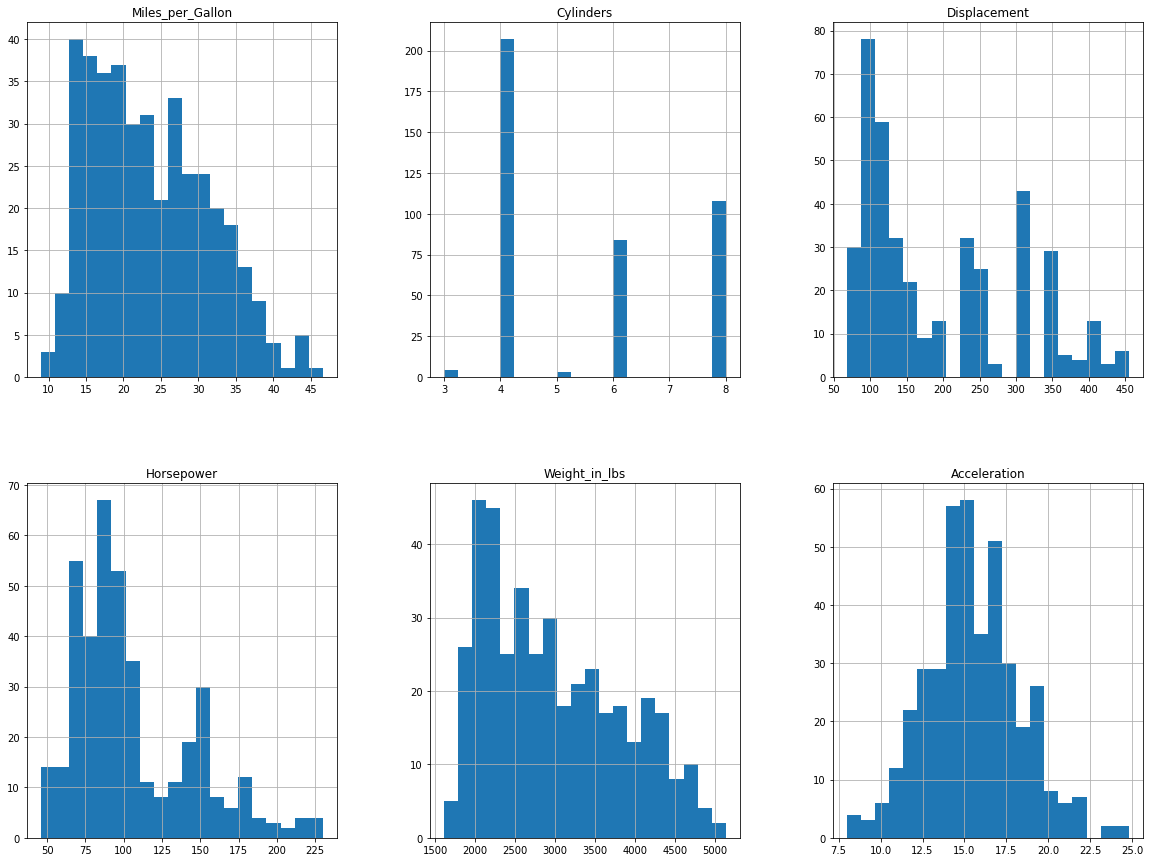

In [9]:
#TODO: Question
car_df.hist(bins=20, figsize=(20,15), layout=(2,3))

In [10]:
#TODO: Length Perception Experiment:
import random
import time
import numpy as np

l_length_short = 1
l_length_long = 10

perceived_length_list = []
actual_length_list = []

def performExperiment_length():
  random_length = random.uniform(l_length_short, l_length_long)
  plt.barh(np.arange(3), [l_length_short, random_length, l_length_long], height=0.5, align='center')
  plt.yticks(np.arange(3), [l_length_short, [], l_length_long])
  plt.xticks([])
  plt.show()

  try:
    perceived_length_list.append(float(input()))
  except:
    print('Some error occured!')
    pass
  actual_length_list.append(random_length)

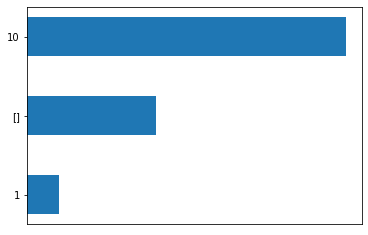

4.5


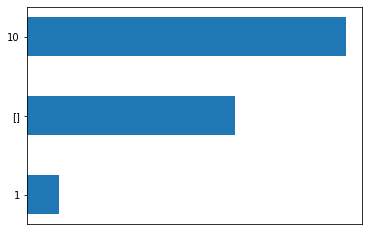

6.6


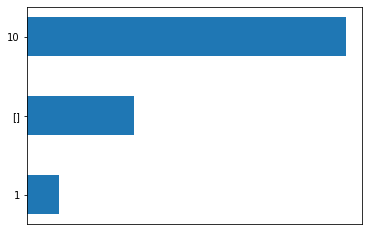

4


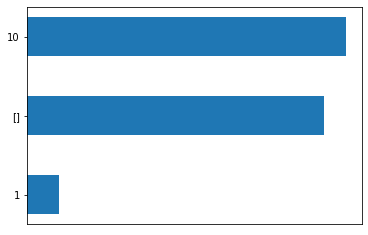

9.5


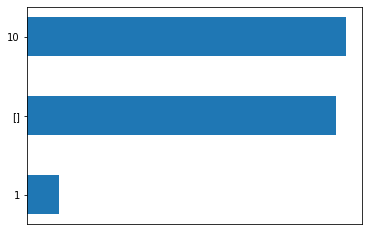

9.9


In [11]:
for i in range(5):
  performExperiment_length() #Performed 5 Times

Text(0.5, 1.0, "Is Steven's power law true?")

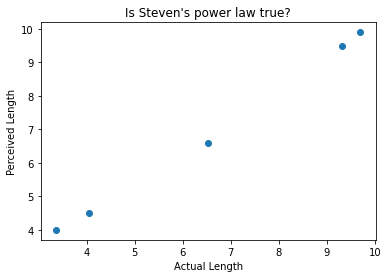

In [23]:
#TODO: Plotted Perceived
plt.scatter(x=actual_length_list, y=perceived_length_list) 
plt.ylabel('Perceived Length')
plt.xlabel('Actual Length')
plt.title('Is Steven\'s power law true?')

In [24]:
# Finding Power_law Curve [Length Perception]
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

x = actual_length_list  # [0,1,2,3, ..., 19]
y = perceived_length_list # [0,1,4,9, ... ]

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))
print(pcov)

0.26 x^1.48 + 2.44
[[ 0.00039167 -0.00058675 -0.00141333]
 [-0.00058675  0.00088054  0.00210326]
 [-0.00141333  0.00210326  0.00528814]]


Text(0, 0.5, 'Expected Value')

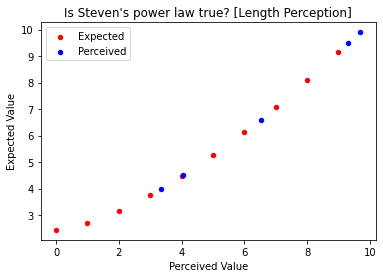

In [37]:
#TODO: Finding Relationship Length Perception [Fitting Data]

ax = plt.subplot()

expectedDataSetX = np.arange(10)
expectedDataSetY = 0.26*np.power(expectedDataSetX,1.48)+2.44

outputExpectedDataSet = pd.DataFrame({
    'x': expectedDataSetX ,
    'y': expectedDataSetY
});

experimentDataSet = pd.DataFrame({
    'x': actual_length_list,
    'y': perceived_length_list
});

plt.title('Is Steven\'s power law true? [Length Perception]')
outputExpectedDataSet.plot(x='x', y='y', kind='scatter', label='Expected', c='red', ax=ax)
experimentDataSet.plot(x='x', y='y', kind='scatter', label='Perceived', c='blue', ax=ax) 
plt.xlabel('Perceived Value')
plt.ylabel('Expected Value')

In [16]:
#Perception of Area

perceived_area_list = []
actual_area_list = []

def performExperiment_Area(n1=0.005, n2=0.05):    
    radius1 = np.sqrt(n1/np.pi) # area = pi * r * r
    radius2 = np.sqrt(n2/np.pi)
    
    mystery_number = random.uniform(1,3)
    random_radius = np.sqrt(n1*mystery_number/math.pi)

    plt.axis('equal')
    plt.axis('off')
    circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
    circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
    rand_circ = plt.Circle((2*radius2,0), random_radius, clip_on=False )
    plt.gca().add_artist(circ1)
    plt.gca().add_artist(circ2)
    plt.gca().add_artist(rand_circ)    
    plt.show()
    takeInput()
    actual_area_list.append(mystery_number)

def takeInput():
    try:
      perceived_area_list.append( float(input()) )
    except:
      print('Some error occured!')
    pass




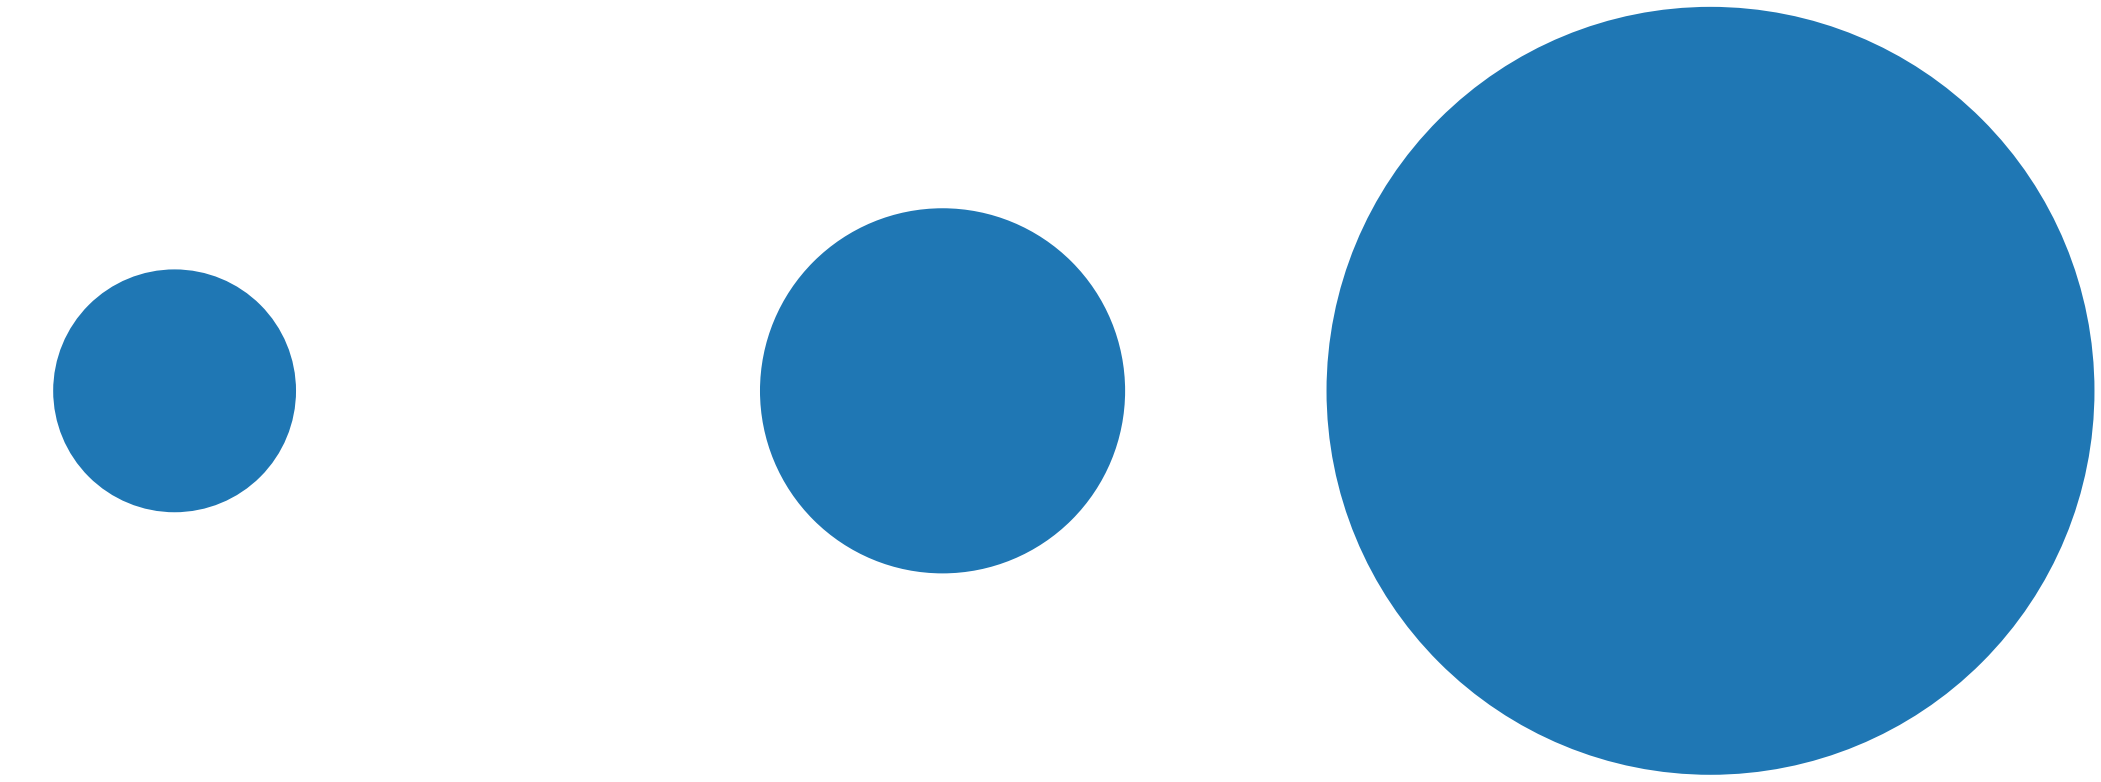

3


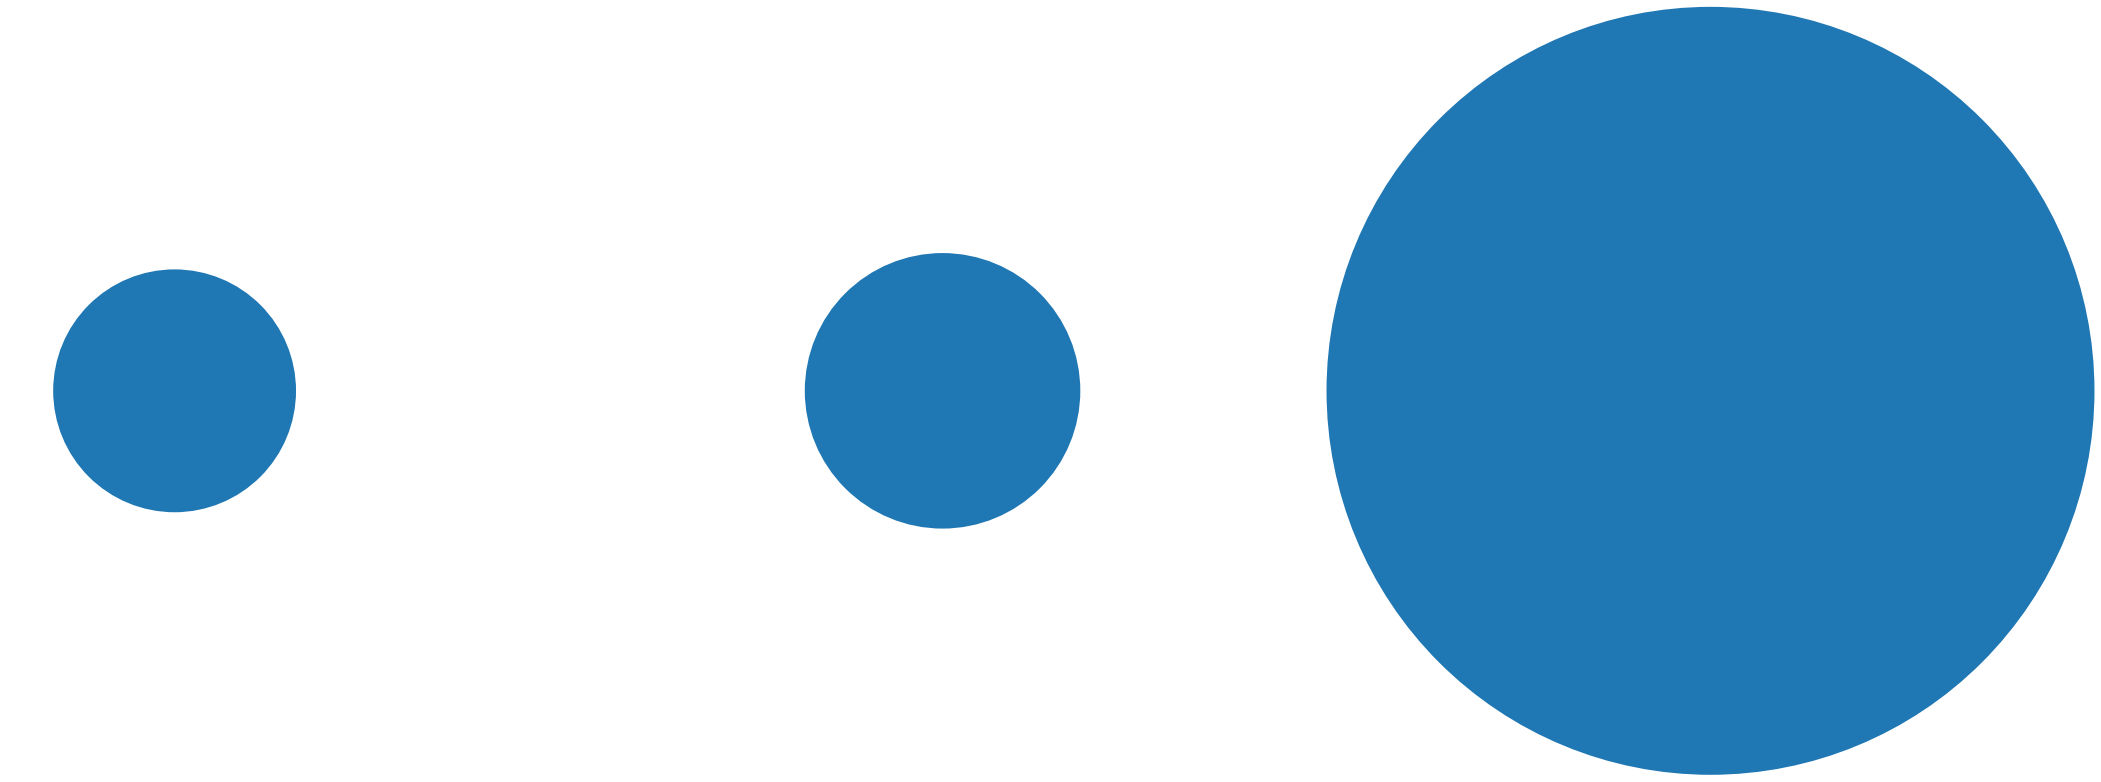

1.2


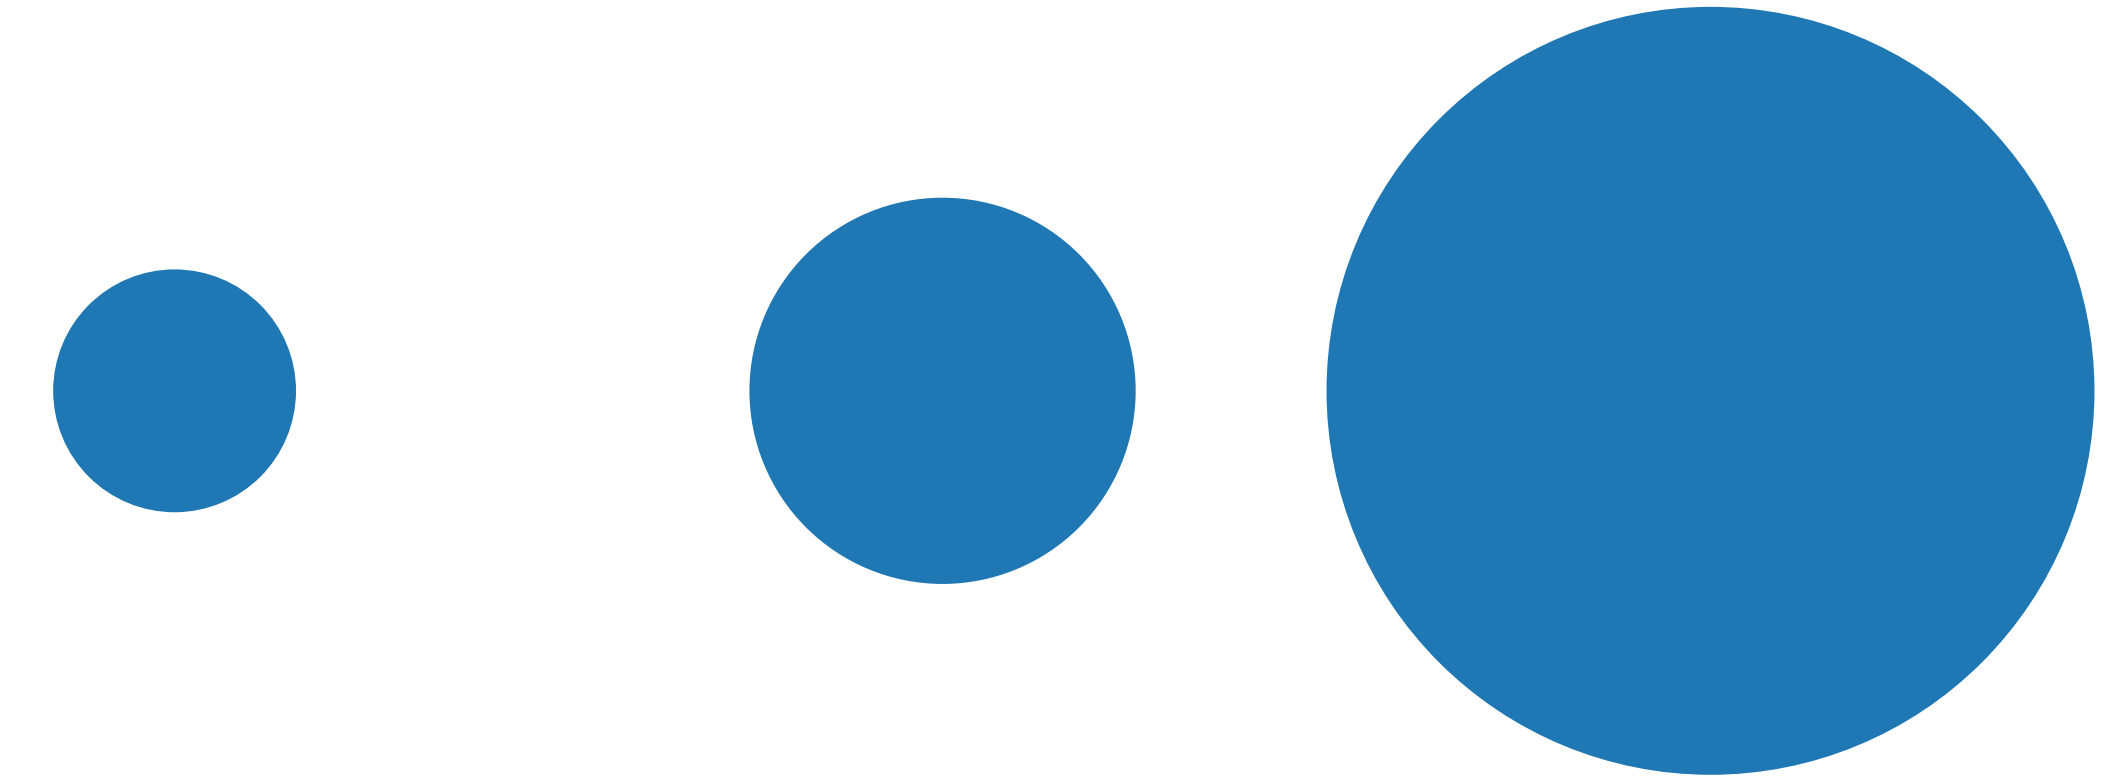

4


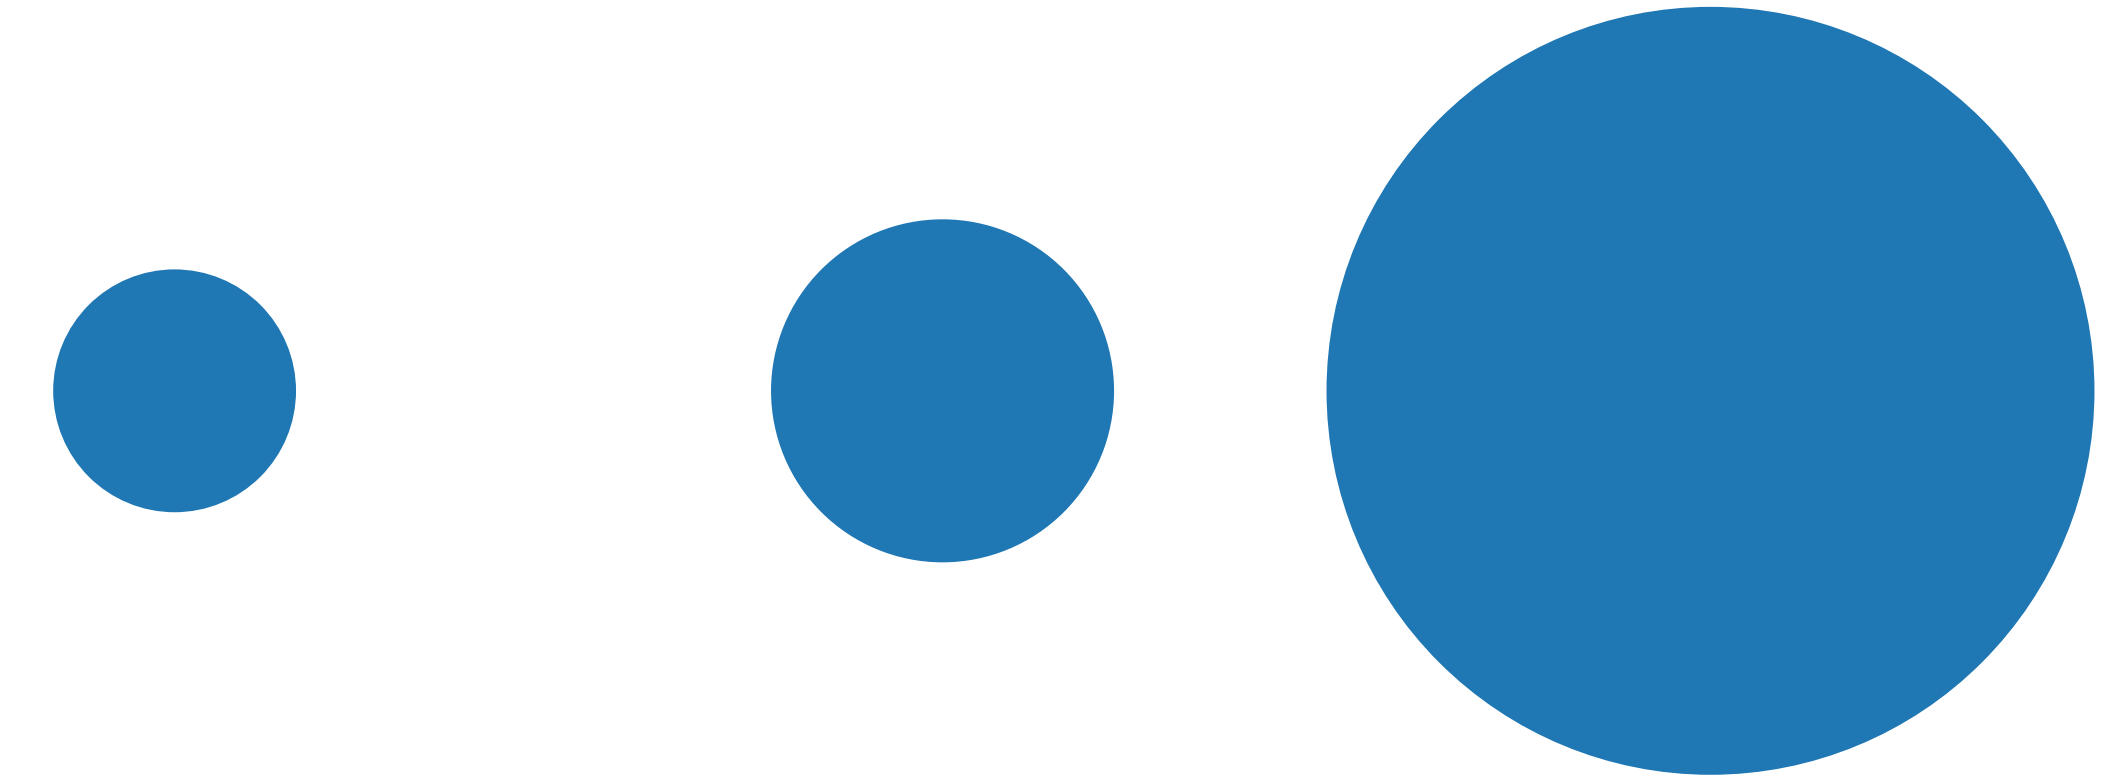

3.5


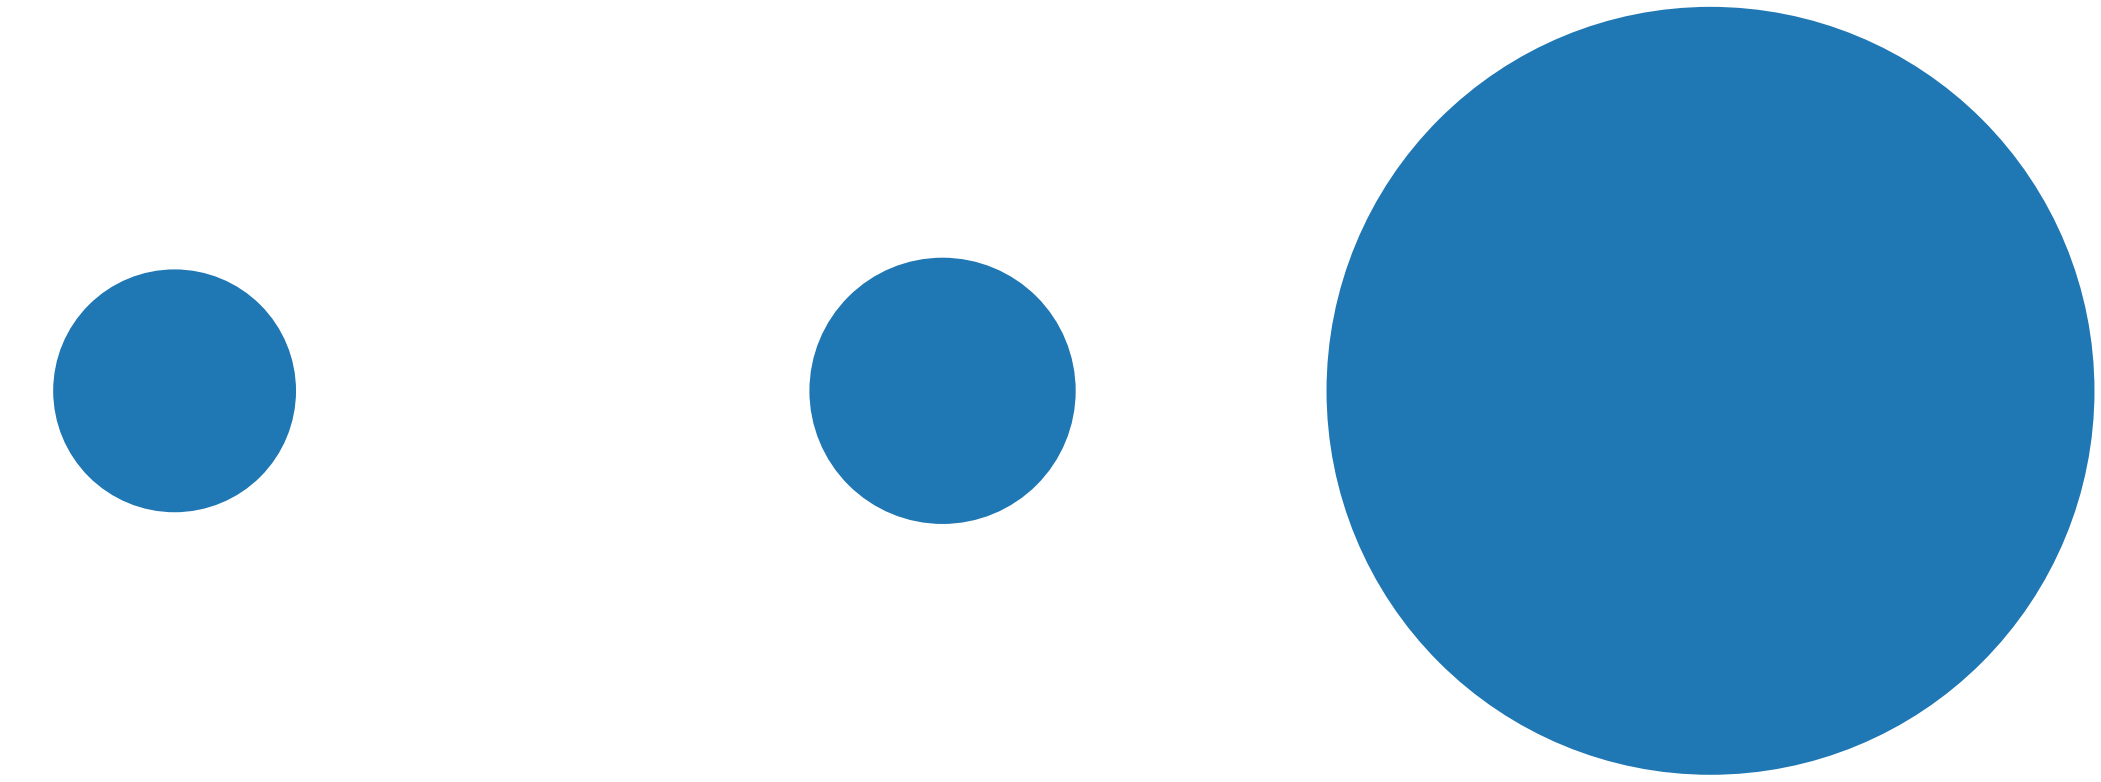

1.1


In [17]:
for i in range(5):
  performExperiment_Area() #Ran 5 Times

In [26]:
#TODO: Finding Power_law Curve [Area Perception]
from scipy.optimize import curve_fit

def funcArea(x, a, b, c):
    return a * np.power(x, b) + c

x_area = actual_area_list  # [0,1,2,3, ..., 19]
y_area = perceived_area_list # [0,1,4,9, ... ]

popt, pcov = curve_fit(funcArea, x, y, maxfev=5000)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))
print(pcov)

0.26 x^1.48 + 2.44
[[ 0.00039167 -0.00058675 -0.00141333]
 [-0.00058675  0.00088054  0.00210326]
 [-0.00141333  0.00210326  0.00528814]]


Text(0, 0.5, 'Expected Value')

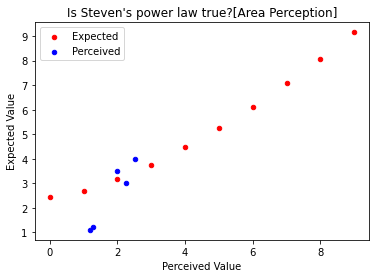

In [36]:
#TODO: Finding Relationship Area Perception [Fitting Data]
ax1 = plt.subplot()

expectedDataSet_area_X = np.arange(10)
expectedDataSet_area_Y = 0.26*np.power(expectedDataSetX,1.48)+2.44

outputExpectedDataSetArea = pd.DataFrame({
    'x': expectedDataSet_area_X,
    'y': expectedDataSet_area_Y
});

experimentDataSetArea = pd.DataFrame({
    'x': actual_area_list,
    'y': perceived_area_list
});
plt.title('Is Steven\'s power law true?[Area Perception]')
outputExpectedDataSetArea.plot(x='x', y='y', kind='scatter', label='Expected', c='red', ax=ax1)
experimentDataSetArea.plot(x='x', y='y', kind='scatter', label='Perceived', c='blue', ax=ax1)
plt.xlabel('Perceived Value')
plt.ylabel('Expected Value')

What is your result? How are the exponents different from each other?

From the above plots we can conclude that it is easier/more accurate to predict data when it is presented as BarGraphs as the Prediction & Expected output are lying on the same line. By virtue of the base ranges it is easier to estimate the 'mystery bar' and the error rate is close to 0.

On the other hand, Perception of plots as area is very tricky to comprehend with estimations. The plot clearly depicts the data, but it is very difficult to segregate a class after comparisions with base ranges.

Hence we should prefer plotting bargraphs over area charts.